In [13]:
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt

import networkx as nx

from src.constants import *

In [14]:
with open(os.path.join(DATA_PATH, "citations_full.pkl"), "rb") as f:
    citations_df = pickle.load(f)

G = nx.DiGraph()

for i, c in citations_df["Citations"].iteritems():
    G.add_node(i)
    for c2 in c:
        G.add_edge(c2, i)

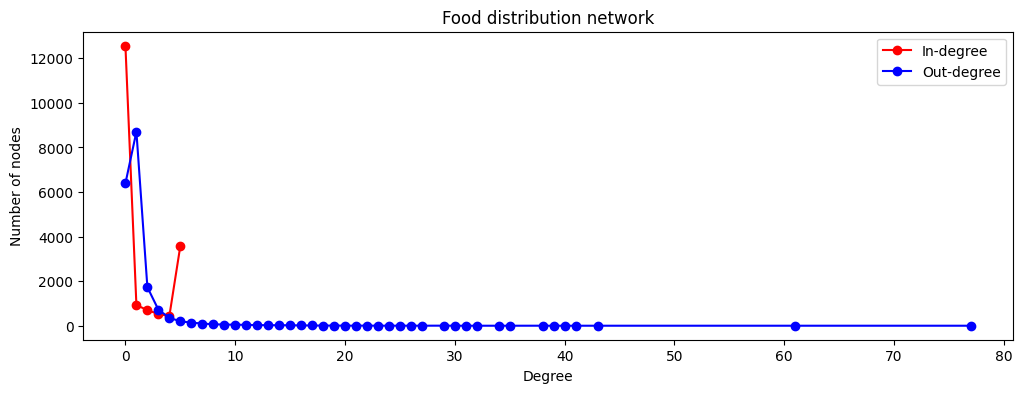

In [20]:
nnodes = G.number_of_nodes()
degrees_in = [d for n, d in G.in_degree()]
degrees_out = [d for n, d in G.out_degree()]
avrg_degree_in = sum(degrees_in) / float(nnodes)
avrg_degree_out = sum(degrees_out) / float(nnodes)
 
in_values = sorted(set(degrees_in))
in_hist = [degrees_in.count(x) for x in in_values]
out_values = sorted(set(degrees_out))
out_hist = [degrees_out.count(x) for x in out_values]
 
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bo-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Food distribution network')
plt.figure(figsize=(12,4))

plt.show()

In [68]:
THRESH_IN = 4

G_in = nx.DiGraph()
G_out = nx.DiGraph()
cnt = 0
for n, d in G.in_degree():
    if cnt < 10 and d == THRESH_IN:
        G_in.add_node(n)
        cnt += 1
        for e in G.in_edges(n):
            G_in.add_edge(e[0], e[1])

In [69]:
len(G_in)

49

In [70]:
from pyvis.network import Network

net = Network(height='600px', width='50%', directed=True)
net.show_buttons(filter_=['physics'])
net.from_nx(G)
net.show(os.path.join(DATA_PATH, "citations_graph.html"))